# SNOwGLoBES Tarfile Reader

Use the `tarfile` module to loop through the SNOwGLoBES files in a directory and push the data into an astropy table.

In [22]:
import tarfile
import numpy as np
from astropy.table import Table
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt

## Open Tarfile

In [4]:
tf = tarfile.open('../../Type Ia/DDT_NeutrinoFlux.tar.bz2')

### Read File List

Grab the list of files inside the archive using a list comprehension.

In [5]:
datafiles = sorted([f.name for f in tf if '.dat' in f.name])
datafiles

['30TimeBins/NuFluxN100v_TBin10_IH11.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH12.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH21.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH22.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH31.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH32.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH41.dat',
 '30TimeBins/NuFluxN100v_TBin10_IH42.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH11.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH12.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH21.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH22.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH31.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH32.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH41.dat',
 '30TimeBins/NuFluxN100v_TBin10_NH42.dat',
 '30TimeBins/NuFluxN100v_TBin10_NoOsc.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH11.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH12.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH21.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH22.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH31.dat',
 '30TimeBins/NuFluxN100v_TBin11_IH32.dat',
 '30TimeBi

### No-oscillation Scenario

Extract the "NoOsc" files.

In [6]:
noosc = [df for df in datafiles if 'NoOsc' in df]
noosc.sort(key = len)

### Extract Data

Loop through the "NoOsc" files and extract data into `astropy.Table` objects.

In [34]:
time = []
lum_nue = []
lum_nuebar = []
lum_numu = []
lum_numubar = []
lum_nutau = []
lum_nutaubar = []
luminosity = [lum_nue, lum_nuebar, lum_numu, lum_numubar, lum_nutau, lum_nutaubar]
for nooscfile in noosc:
    with tf.extractfile(nooscfile) as f:
        meta = f.readline()
        metatext = meta.decode('utf-8')
        print(metatext)
        t = float(metatext.split('TBinMid=')[-1].split('sec')[0]) #* u.s
        dt = float(metatext.split('tBinWidth=')[-1].split('s')[0]) * u.s
        dE = float(metatext.split('eBinWidth=')[-1].split('MeV')[0]) * u.MeV
        data = Table.read(f, format='ascii.commented_header', header_start=-1)
        data.meta['t'] = t
        data.meta['dt'] = dt
        data.meta['dE'] = dE
        for lumlist, filelist in zip(luminosity, [data['NuE'], data['aNuE'], data['NuMu'], data['aNuMu'], data['NuTau'], data['aNuTau']]):
            lum = np.trapz(filelist , data['E(GeV)'] )
            lumlist.append(lum)
#         print(lum)
#         lum_nue.append(lum)
        time.append(t)
        print(t)
#         print(nooscfile)    
#         break
# data

# N100v@TBinMid=0.0742746sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.0742746
# N100v@TBinMid=0.122625sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.122625
# N100v@TBinMid=0.170976sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.170976
# N100v@TBinMid=0.219327sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.219327
# N100v@TBinMid=0.267677sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.267677
# N100v@TBinMid=0.316028sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.316028
# N100v@TBinMid=0.364379sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.364379
# N100v@TBinMid=0.412729sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux in Number Neutrinos per cm^2					

0.412729
# N100v@TBinMid=0.46108sec@(tBinWidth=0.04835s)(eBinWidth=0.2MeV)	Flux

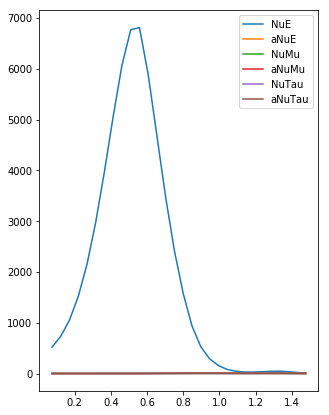

In [37]:
fig, ax = plt.subplots(1, 1, figsize = (5, 7))
for lumlist, flavor in zip(luminosity, ['NuE', 'aNuE', 'NuMu', 'aNuMu', 'NuTau', 'aNuTau']):
    ax.plot(time, lumlist, label = flavor)
ax.legend()

1. Integrate each column w.r.t energy
1. Avg energy and E$^2$ to calculate $\alpha$